In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task-1 Understand the data

In [ ]:
df= pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
#checking for missing values
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
# information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# custumer ID is no where useful for clustering . so we can drop that column
df.drop(["CustomerID"],axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-10-eadded8c5a92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
<ipython-input-10-eadded8c5a92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
<ipython-input-10-eadded8c5a92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

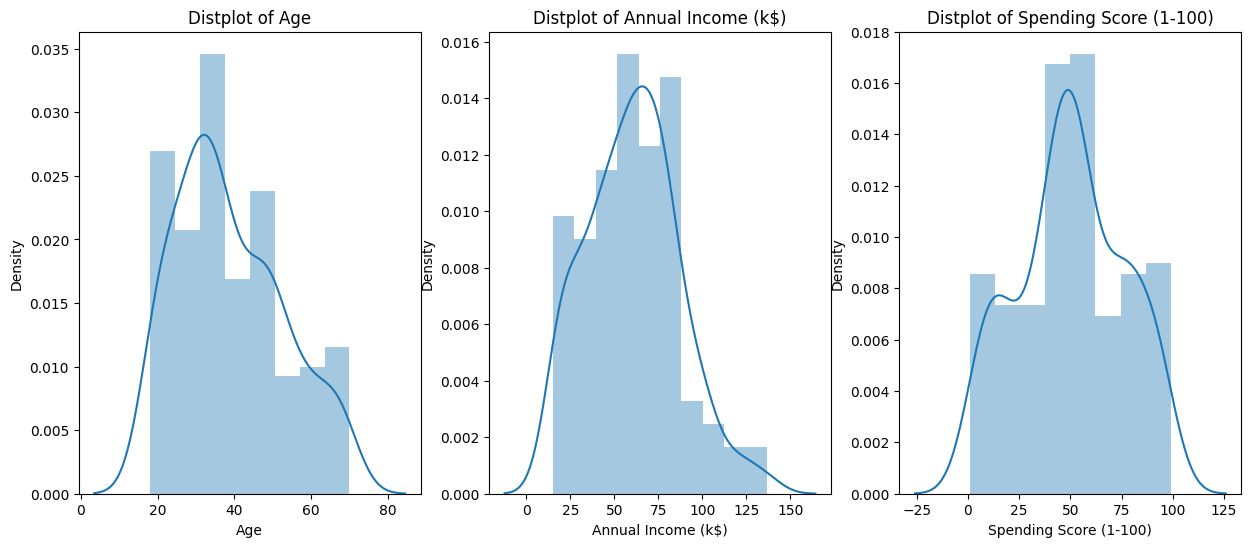

In [10]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n=n+1
  plt.subplot(1,3,n)
  sns.distplot(df[x])
  plt.title('Distplot of {}'.format(x))
plt.show()


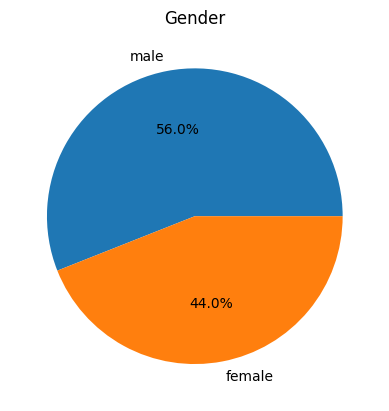

In [11]:
plt.pie(df.Gender.value_counts(),labels=['male','female'],autopct='%1.1f%%')
plt.title('Gender')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

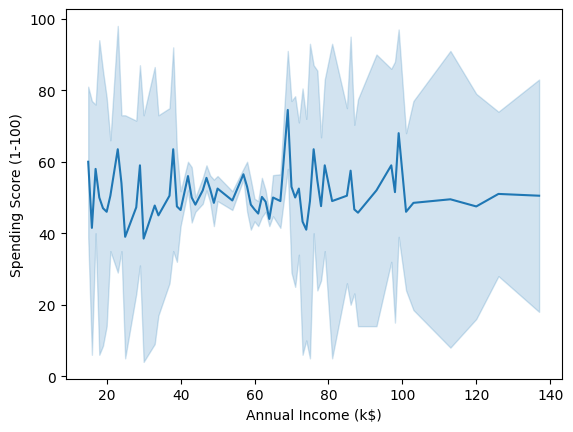

In [12]:
sns.lineplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

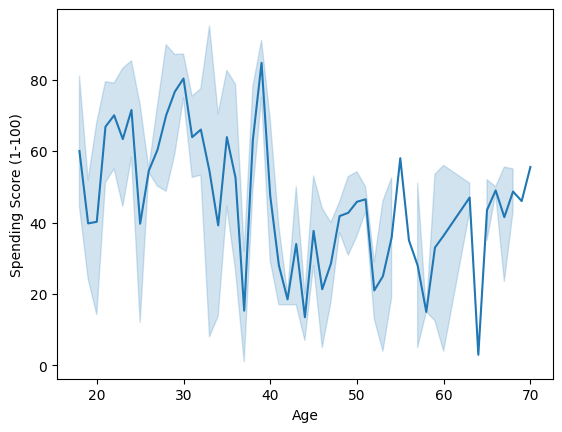

In [13]:
sns.lineplot(x=df['Age'],y=df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

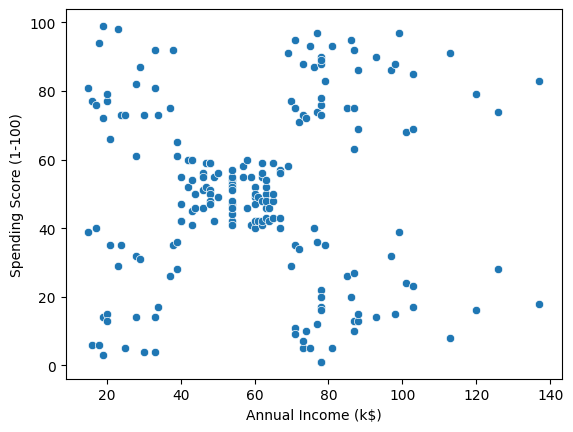

In [14]:
#scatterplot
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

# Task -2 Data preprocessing

checking for outliers

<Axes: >

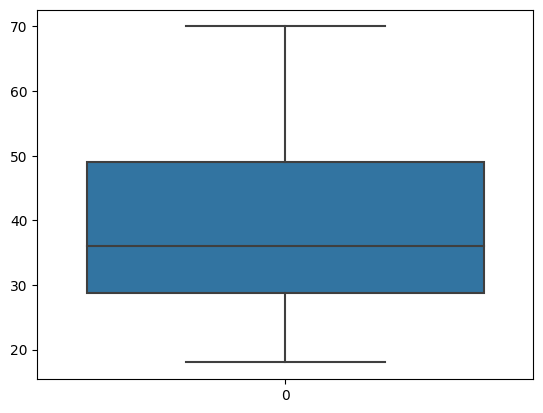

In [15]:
sns.boxplot(df.Age)
#Age','Annual Income (k$)','Spending Score (1-100)

<Axes: >

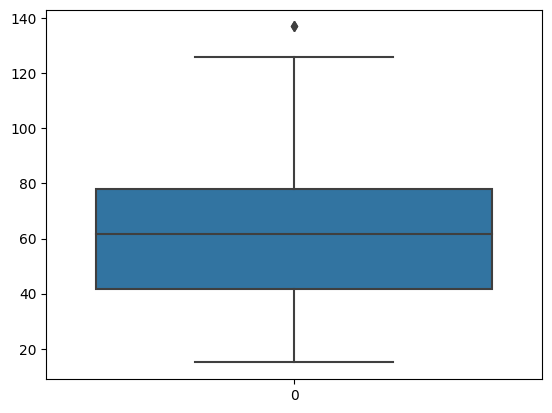

In [16]:
sns.boxplot(df['Annual Income (k$)'])


<Axes: >

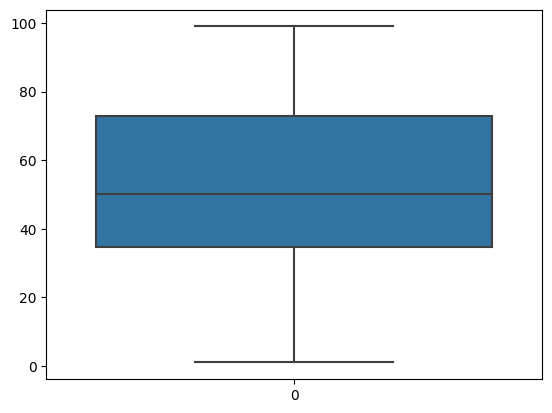

In [17]:
sns.boxplot(df['Spending Score (1-100)'])


In [18]:
# Removing outliers from Annual income column

q1 = df['Annual Income (k$)'].quantile(0.25) #Q1
q3 = df['Annual Income (k$)'].quantile(0.75) #Q3
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

print(upper_limit)
print(lower_limit)

132.75
-13.25


In [19]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [20]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])

<Axes: >

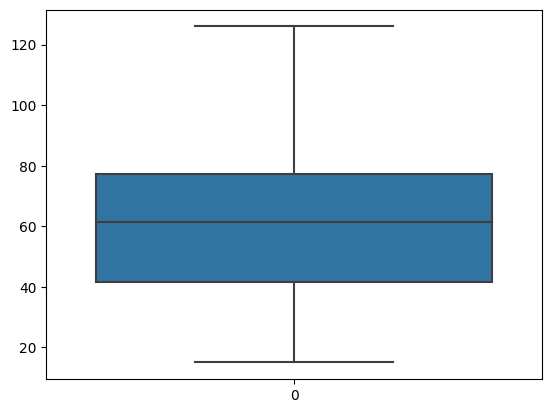

In [21]:
sns.boxplot(df['Annual Income (k$)'])


Label encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [24]:
df.Gender= le.fit_transform(df.Gender)


In [31]:
# taking all parameters
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [26]:
# taking annual income and spending score as the parameters
df1 = df.iloc[:,2:]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40


In [27]:
# taking age,annual income and spending score as the parameters
df2= df.iloc[:,1:]
df2.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15.0,39
1,21,15.0,81
2,20,16.0,6
3,23,16.0,77
4,31,17.0,40


In [30]:
# taking age and spending score as the parameters
df3=df.iloc[:,[1,-1]]
df3.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [38]:
df_scaled = scaler.fit_transform(df)


In [39]:
df1_scaled = scaler.fit_transform(df1)


In [40]:
df2_scaled = scaler.fit_transform(df2)


In [41]:
df3_scaled = scaler.fit_transform(df3)


# Task-3 Machine Learning approach with clustering algorithm

In [42]:
from sklearn import cluster


for df1

In [71]:

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df1_scaled)
  error.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [72]:
error


[399.9999999999999,
 267.65356271448735,
 158.25007683695733,
 108.2325796247875,
 63.138175098564076,
 53.94908917133441,
 44.875564685486296,
 36.78209414966159,
 32.010620188830046,
 28.996419911313236]

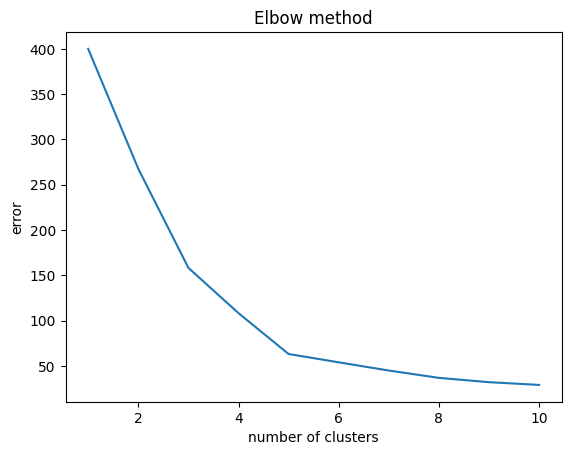

In [73]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [74]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)


In [75]:
km_model.fit(df1_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [77]:
pred = km_model.predict(df1_scaled)
pred


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [81]:
# Test the model with random observation

km_model.predict([[16.0,	77]])


array([2], dtype=int32)

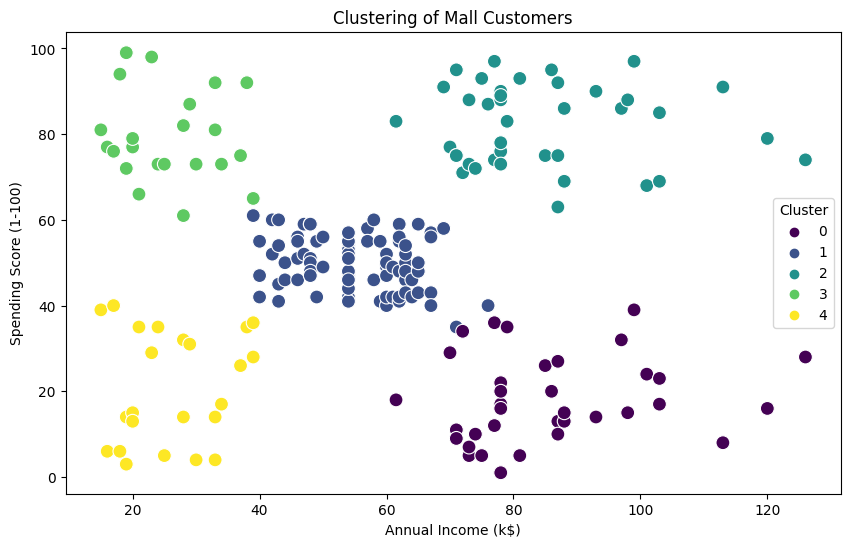

In [82]:


# Add cluster labels to the original dataset
df['Cluster'] = pred

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering of Mall Customers')
plt.show()



In [83]:
from sklearn.metrics import silhouette_score


In [85]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df1_scaled, pred)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5547180113417072


for df2

In [86]:

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df2_scaled)
  error.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [87]:
error


[600.0000000000001,
 389.3868684095572,
 295.9415119901179,
 205.48223928182426,
 167.0228054096568,
 131.64611024593555,
 114.8193846600733,
 101.35224032780414,
 89.24617954778907,
 80.04619678733408]

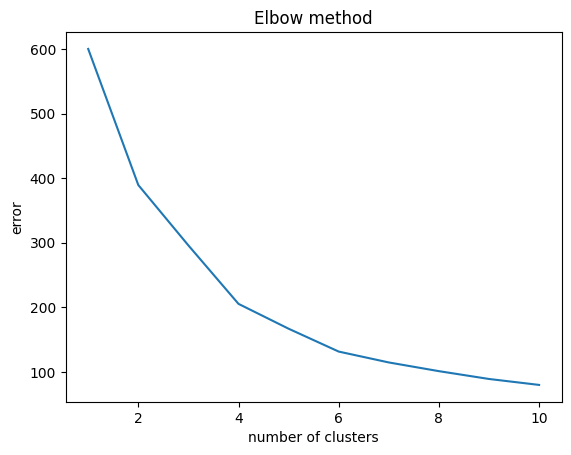

In [88]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [89]:
km_model = cluster.KMeans(n_clusters=6,init = 'k-means++',random_state=0)
km_model.fit(df2_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [90]:
pred = km_model.predict(df2_scaled)
pred


array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 5, 3, 2, 3,
       2, 3, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 5, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       4, 1], dtype=int32)

In [92]:
# Test the model with random observation

km_model.predict([[15,16.0,	77]])

array([1], dtype=int32)

In [94]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df2_scaled, pred)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.43016462760459745


for df3

In [95]:

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df3_scaled)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [96]:
error


[399.9999999999999,
 189.38749033992428,
 124.32628617921532,
 89.76521676586151,
 71.09364141459412,
 53.128438356294026,
 45.903798612012075,
 39.39545917716782,
 33.86021150658476,
 28.80084946927365]

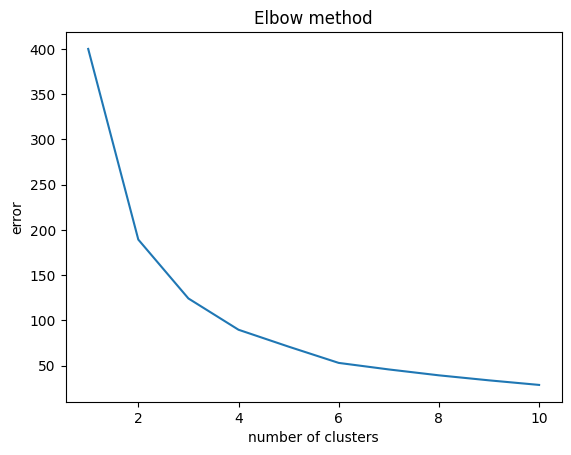

In [97]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [98]:
km_model = cluster.KMeans(n_clusters=6,init = 'k-means++',random_state=0)
km_model.fit(df3_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [99]:
pred = km_model.predict(df3_scaled)
pred


array([0, 2, 4, 2, 0, 2, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 0, 3, 2, 4, 2,
       3, 2, 3, 2, 1, 0, 4, 2, 3, 2, 3, 2, 3, 2, 4, 2, 4, 2, 5, 2, 1, 0,
       3, 0, 1, 0, 0, 0, 1, 0, 0, 5, 1, 1, 1, 5, 0, 1, 5, 0, 5, 1, 5, 0,
       1, 5, 0, 0, 5, 1, 5, 5, 5, 0, 1, 1, 0, 1, 5, 1, 5, 1, 0, 1, 1, 0,
       0, 1, 5, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 5, 0, 1, 0, 5, 1, 5, 5,
       5, 0, 1, 0, 0, 0, 5, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 4, 2, 3, 2, 4, 2, 3, 2, 0, 2, 4, 2, 1, 2, 4, 2, 4, 2, 3, 2,
       3, 2, 4, 2, 4, 2, 1, 2, 4, 2, 3, 2, 4, 2, 4, 0, 4, 2, 4, 2, 3, 2,
       3, 2, 3, 2, 4, 2, 3, 2, 1, 2, 3, 2, 4, 2, 4, 2, 4, 2, 3, 2, 1, 2,
       4, 2], dtype=int32)

In [100]:
# Test the model with random observation

km_model.predict([[15,	77]])

array([2], dtype=int32)

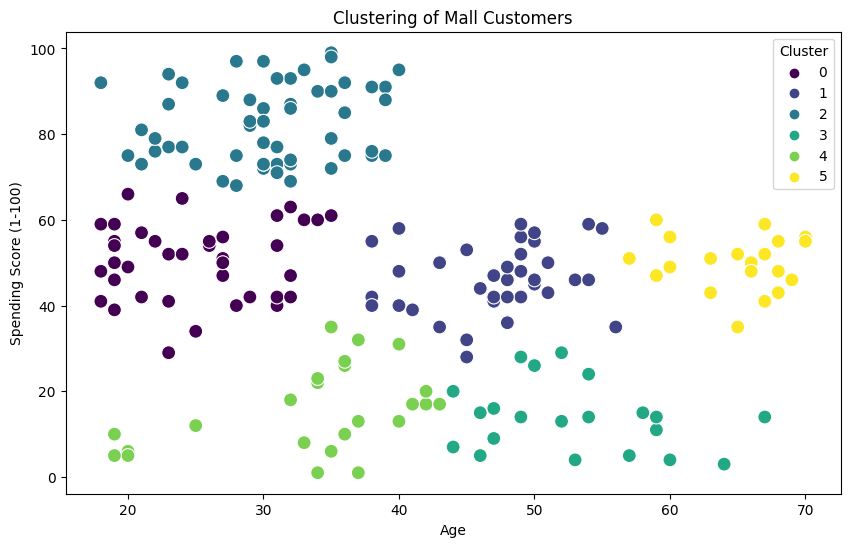

In [101]:


# Add cluster labels to the original dataset
df['Cluster'] = pred

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering of Mall Customers')
plt.show()


In [102]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df3_scaled, pred)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4566283030197353


for df

In [103]:

error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df_scaled)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [104]:
error


[800.0000000000002,
 588.8033562356138,
 477.38499162307966,
 389.5968649815535,
 326.81695277491116,
 276.2603505459519,
 236.6991953333777,
 200.37513244180604,
 173.421770719527,
 150.03320384962316]

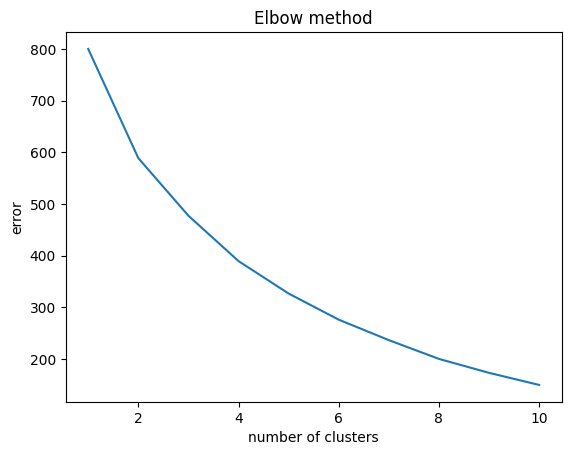

In [105]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [107]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)
km_model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [109]:
pred = km_model.predict(df_scaled)
pred


array([3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 2, 2, 3, 1, 1, 2, 3,
       1, 1, 3, 3, 2, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 3,
       3, 1, 1, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2,
       2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0], dtype=int32)

In [111]:
# Test the model with random observation

km_model.predict([[0,15,16.0,	77]])

array([0], dtype=int32)

In [113]:
# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df_scaled, pred)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.29703108322312277
